# import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

# load dataset

In [14]:
df_train = pd.read_csv('./data/df_train_prepared.csv')
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,std15,std16,std17,std18,std19,std20,std21,ttf,bnc_label,mcc_lable
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [ ]:
df_train.shape

(20631, 71)

In [15]:
df_test = pd.read_csv('./data/df_test_prepared.csv')
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,std15,std16,std17,std18,std19,std20,std21,ttf,bnc_label,mcc_label
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


In [5]:
df_test.shape

(100, 71)

# Regression Modeling

### split data

In [41]:
# original features
features_orignal = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_all = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3','s4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                's15', 's16', 's17', 's18', 's19', 's20', 's21', 'avg1', 'avg2', 'avg3','avg4', 'avg5', 'avg6', 'avg7', 'avg8', 'avg9', 'avg10',
                'avg11','avg12', 'avg13', 'avg14', 'avg15', 'avg16', 'avg17', 'avg18', 'avg19','avg20', 'avg21', 'std1', 'std2', 'std3', 'std4',
                'std5', 'std6','std7', 'std8', 'std9', 'std10', 'std11', 'std12', 'std13', 'std14','std15', 'std16', 'std17', 'std18', 'std19', 'std20', 'std21']


# features with low or no correlation with regression label
features_lowcor = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# features that have correlation with regression label
features_highcor = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

# a variable to hold the set of features to experiment with
features = features_orignal


In [17]:
# split data
def split_data(df, features):
    X = df[features]
    y = df['ttf']
    
    return X, y

In [42]:
X, y = split_data(df_train, features)
print(f" X shape: {X.shape} \n y shape: {y.shape}")

 X shape: (20631, 24) 
 y shape: (20631,)


In [43]:
# split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" X_train shape: {X_train.shape} \n y_train shape: {y_train.shape}")
print(f" X_val shape: {X_val.shape} \n y_val shape: {y_val.shape}")

 X_train shape: (16504, 24) 
 y_train shape: (16504,)
 X_val shape: (4127, 24) 
 y_val shape: (4127,)


In [44]:
# show max and min values of s3 before scaling
print(f" max value of s3 before scaler: {X_train['s3'].max()}")
print(f" min value of s3 before scaler: {X_train['s3'].min()}")

 max value of s3 before scaler: 1614.93
 min value of s3 before scaler: 1571.04


In [45]:
# scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [46]:
# show max and min values of s3 after scaling
print(f" max value of s3 after scaler: {X_train_scaled[:, 5].max():.2f}")
print(f" min value of s3 after scaler: {X_train_scaled[:, 5].min():.2f}")

print(f"\n max value of s3 after scaler : {np.max(X_train_scaled[:, 5]):.2f}")
print(f" min value of s3 after scaler : {np.min(X_train_scaled[:, 5]):.2f}")


 max value of s3 after scaler: 3.97
 min value of s3 after scaler: -3.17

 max value of s3 after scaler : 3.97
 min value of s3 after scaler : -3.17


### helper functions

### Evaluate the Model

To evaluate the performance of your model, you will want to measure the error for the training and cross validation sets. For the training error, recall the equation for calculating the mean squared error (MSE):

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

Scikit-learn also has a built-in [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function that you can use. Take note though that [as per the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), scikit-learn's implementation only divides by `m` and not `2*m` (where `m` = number of examples). Thus, to match the equation above, you can use the scikit-learn function then divide by two as shown below. We also included a for-loop implementation so you can check that it's equal. 


In [23]:
def regressor_metrics(model, y_hat, y_true):
    """
    args:
        model (str): name of regression model
        y_hat (array): predicted values
        y_true (array): true values
        
    returns:
        rmse (float): root mean squared error
        mae (float): mean absolute error
        r2 (float): r2 score
        evs (float): explained variance score
    """
    
    regres_metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_hat)) / 2,
        'MAE': mean_absolute_error(y_true, y_hat),
        'R2': r2_score(y_true, y_hat),
        'EVS': explained_variance_score(y_true, y_hat)
    }
    
    regr_df = pd.DataFrame.from_dict(regres_metrics, orient='index')
    regr_df.columns = [model]
    
    return regr_df

def RMSE(y_hat, y_true):
    return np.sqrt(mean_squared_error(y_true, y_hat)) / 2

In [24]:
def plot_feature_weights(model, weights, names, types = 'c'):
    """
    args:
        model (str): name of regression model
        weights (array): feature weights
        names (array): feature names
        type (str): type of plot
    
    returns:
        plot of feature weights/importances
    
    """
    plt.style.use('fivethirtyeight')
    
    (px, py) = (9, 7) if types == 'c' else (9, 8)
    W = pd.DataFrame({'weights': weights}, index=names)
    W.sort_values('weights', ascending=True).plot(kind='barh', figsize=(px, py), color='r', title=model)
    plt.ylabel('Features')
    label = 'feature coefficients' if types == 'c' else 'feature importances'
    plt.xlabel(model + ' ' + label)
    plt.show()    

In [25]:
def plot_residuals(model, y_train_hat, y_train_true, y_val_hat, y_val_true):
    """
    args:
        model (str): name of regression model
        y_train_hat (array): predicted values of training set
        y_train_true (array): true values of training set
        y_val_hat (array): predicted values of validation set
        y_val_true (array): true values of validation set
        
    returns:
        plot of residuals
    """
    
    residuals_train = y_train_hat - y_train_true
    residuals_val = y_val_hat - y_val_true
    
    plt.style.use('ggplot')
    
    plt.figure(figsize=(10,5))
    plt.scatter(y_train_hat, residuals_train, color='b', marker='o', label= 'Training data')
    plt.scatter(y_val_hat, residuals_val, color='y', marker='s', label= 'Validation data')
    plt.title(model + ' Residuals plot')
    plt.ylabel('Residuals')
    plt.xlabel('Predicted Values')
    plt.axhline(y=0, xmin=-60, xmax=500, color='r', lw=2)
    plt.legend(loc='upper left')
    plt.show()

### linear regression


In [26]:

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_predict = linreg.predict(X_train)
y_val_predict = linreg.predict(X_val)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

linreg_metrics_select_features = regressor_metrics('Linear Regression', y_val, y_val_predict)
linreg_metrics_select_features


R^2 training: 0.582, R^2 test: 0.570


,Linear Regression
RMSE,22.170934
MAE,34.050297
R2,0.268012
EVS,0.268345


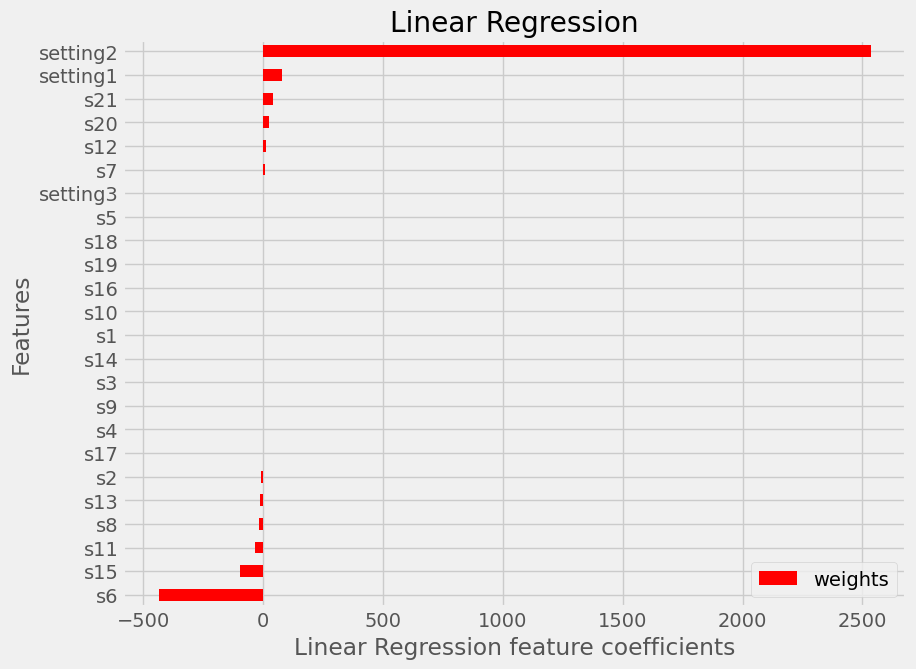

In [82]:
plot_feature_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

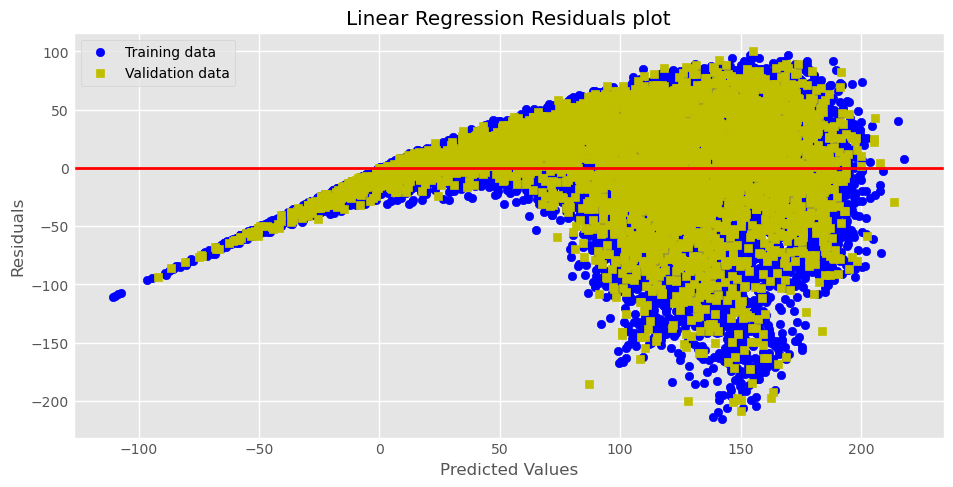

In [46]:
plot_residuals('Linear Regression', y_train_predict, y_train, y_val_predict, y_val)

### DecisionTreeRegressor

In [27]:
decision_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
decision_tree.fit(X_train_scaled, y_train)

y_train_predict = decision_tree.predict(X_train_scaled)
y_val_predict = decision_tree.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

decision_tree_metrics = regressor_metrics('Decision Tree', y_val, y_val_predict)
decision_tree_metrics   

R^2 training: 0.611, R^2 test: 0.581


,Decision Tree
RMSE,21.865888
MAE,31.950508
R2,0.330729
EVS,0.331291


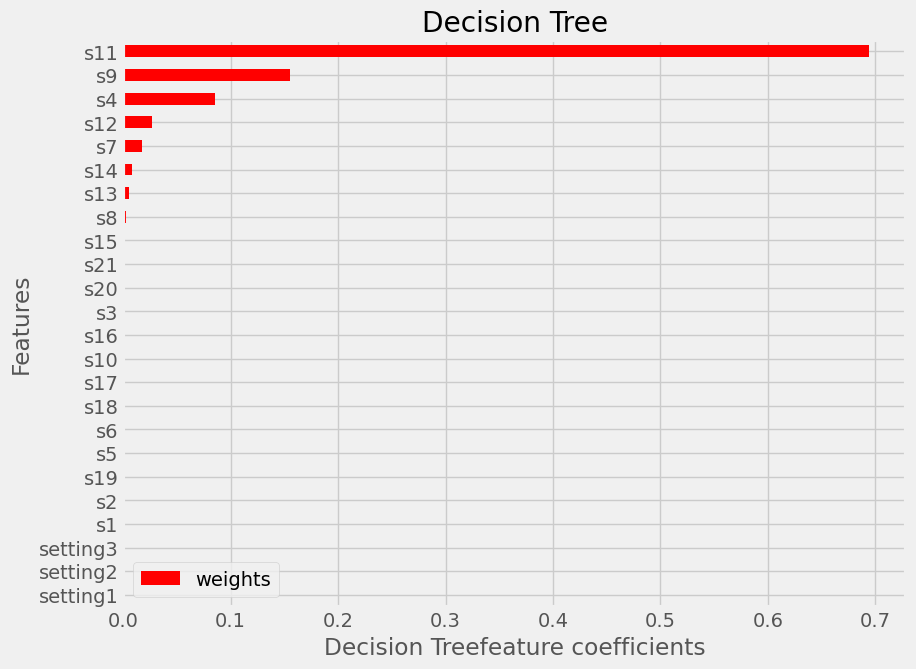

In [69]:
plot_feature_weights('Decision Tree', decision_tree.feature_importances_, X_train.columns, 't')

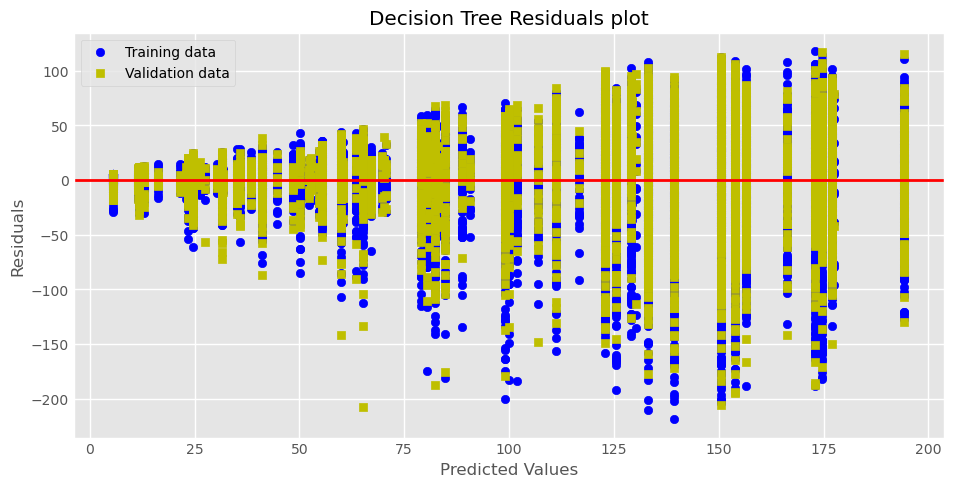

In [70]:
plot_residuals('Decision Tree', y_train_predict, y_train, y_val_predict, y_val)

### RandomForestRegressor

In [28]:
random_forest = RandomForestRegressor(n_estimators=100, max_depth=6, max_features='auto', random_state=42)
random_forest.fit(X_train_scaled, y_train)

y_train_predict = random_forest.predict(X_train_scaled)
y_val_predict = random_forest.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

random_forest_metrics = regressor_metrics('Random Forest', y_val, y_val_predict)
random_forest_metrics

R^2 training: 0.641, R^2 test: 0.614


,Random Forest
RMSE,21.003841
MAE,30.337481
R2,0.351079
EVS,0.351430


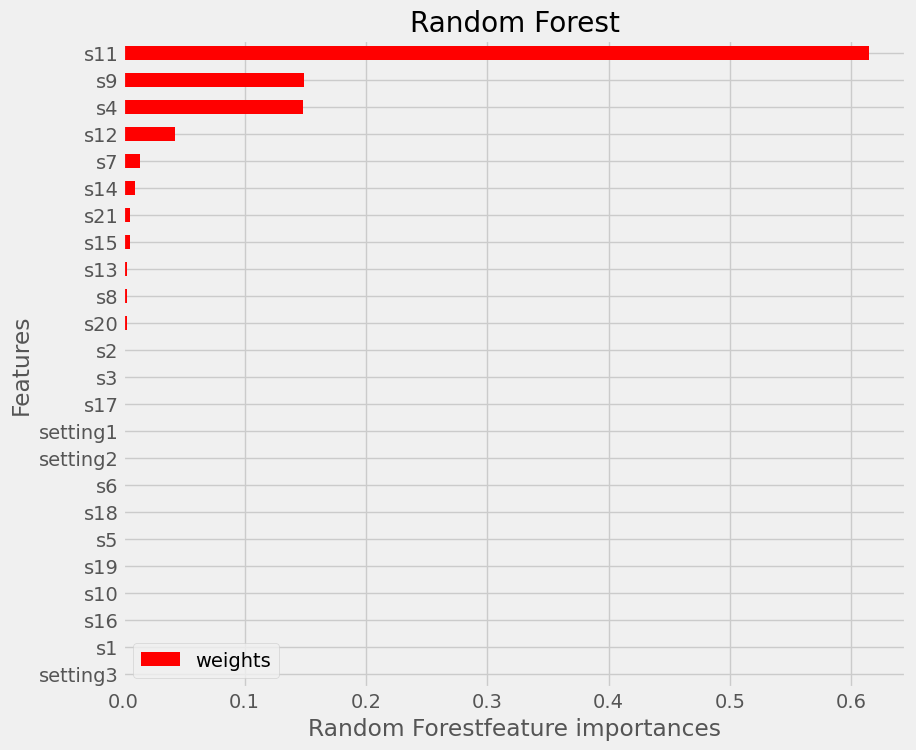

In [73]:
plot_feature_weights('Random Forest', random_forest.feature_importances_, X_train.columns, 't')

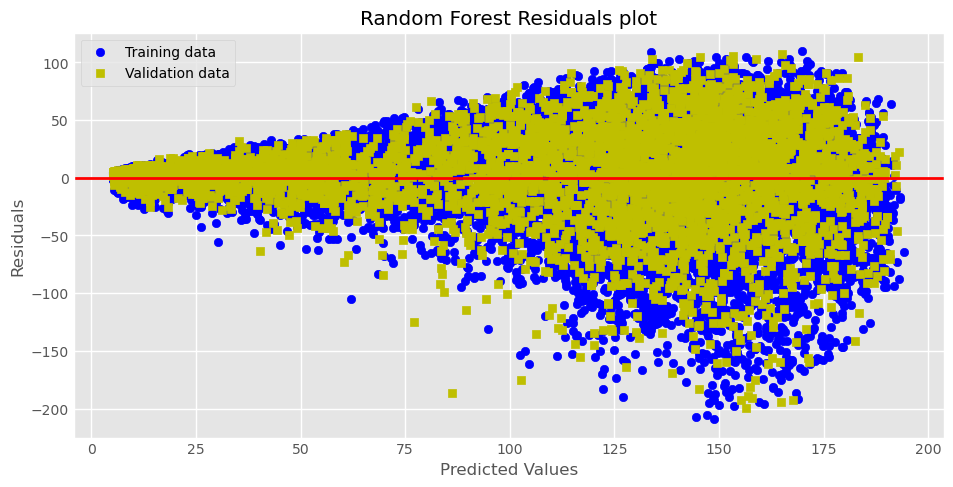

In [74]:
plot_residuals('Random Forest', y_train_predict, y_train, y_val_predict, y_val)

### lightgbm

In [29]:
lightgbm = LGBMRegressor(n_estimators=100, max_depth=6, random_state=42)
lightgbm.fit(X_train_scaled, y_train)

y_train_predict = lightgbm.predict(X_train_scaled)
y_val_predict = lightgbm.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

lightgbm_metrics = regressor_metrics('LightGBM', y_val, y_val_predict)
lightgbm_metrics

R^2 training: 0.720, R^2 test: 0.625


,LightGBM
RMSE,20.705908
MAE,29.618619
R2,0.434949
EVS,0.435240


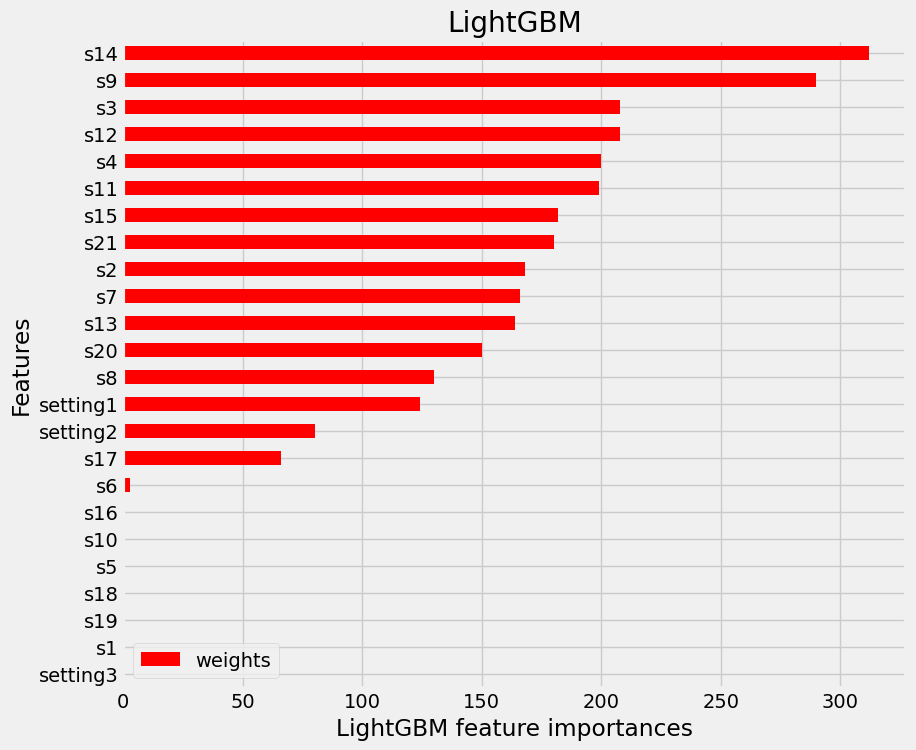

In [15]:
plot_feature_weights('LightGBM', lightgbm.feature_importances_, X_train.columns, 't')

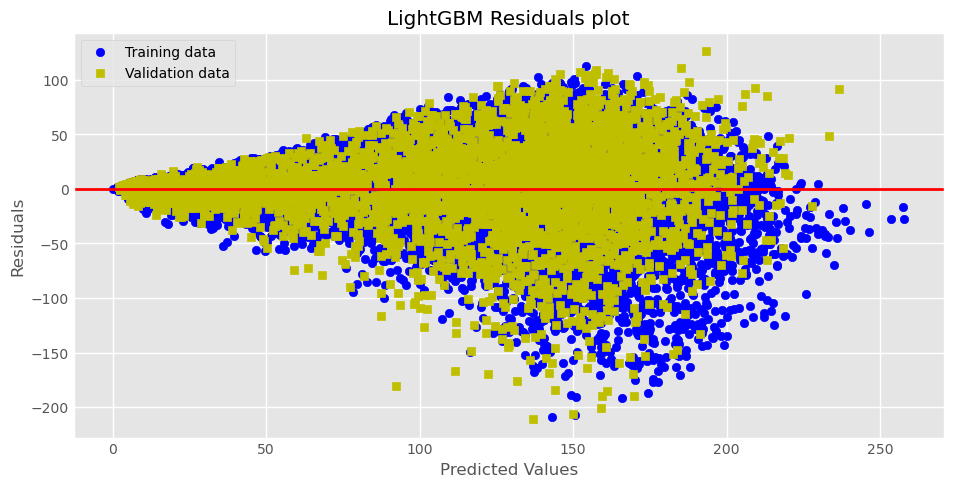

In [16]:
plot_residuals('LightGBM', y_train_predict, y_train, y_val_predict, y_val)

### xgboost

In [30]:
xgb = XGBRegressor(n_estimators=100, max_depth=6, random_state=42)
xgb.fit(X_train_scaled, y_train)

y_train_predict = xgb.predict(X_train_scaled)
y_val_predict = xgb.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

xgb_metrics = regressor_metrics('XGBoost', y_val, y_val_predict)
xgb_metrics

R^2 training: 0.849, R^2 test: 0.585


,XGBoost
RMSE,21.775573
MAE,31.011036
R2,0.403404
EVS,0.403623


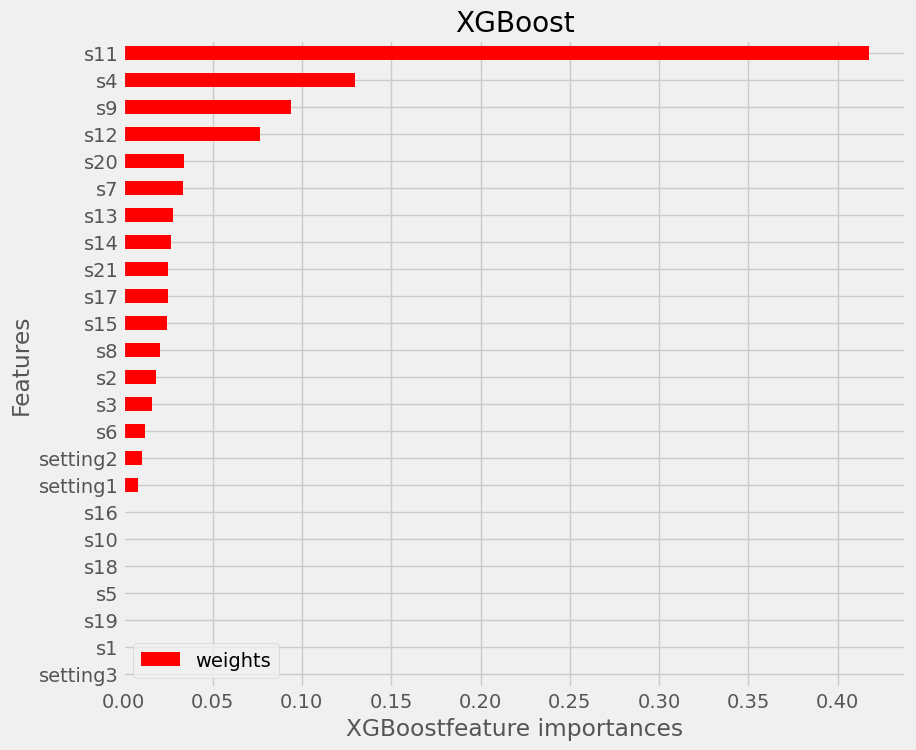

In [79]:
plot_feature_weights('XGBoost', xgb.feature_importances_, X_train.columns, 't')

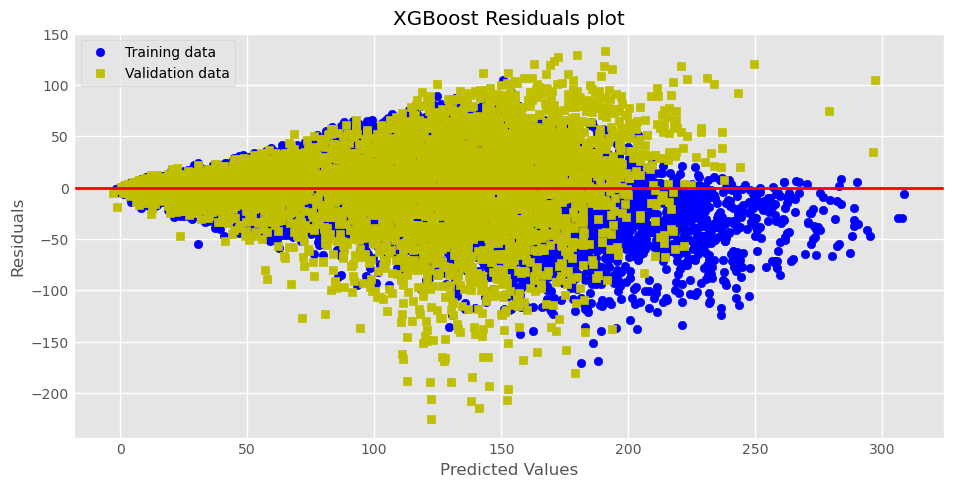

In [80]:
plot_residuals('XGBoost', y_train_predict, y_train, y_val_predict, y_val)

## hyperparameter tuning

#### Random Forest

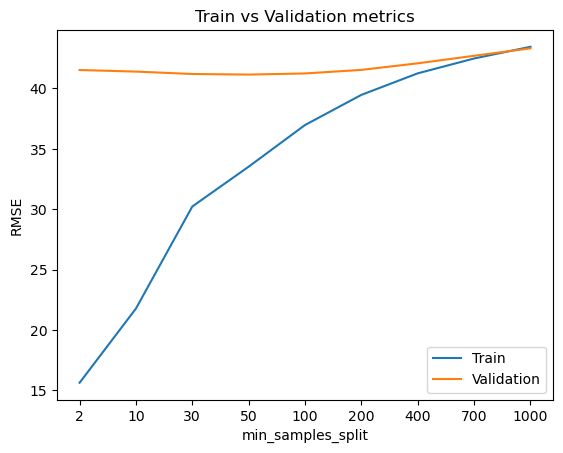

In [14]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 400, 700, 1000]
max_depth_list = [1,2, 3, 4, 7, 8, 16, 32, 64, None] # None means that there is no depth limit.
n_estimators_list = [10,50,100,500]


RMSE_list_train = []
RMSE_list_val = []

for min_samples_split in min_samples_split_list:

    # fit the model
    model = RandomForestRegressor(min_samples_split = min_samples_split,random_state = 42).fit(X_train_scaled,y_train)

    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    RMSE_train = RMSE(y_train,predictions_train)
    RMSE_val = RMSE(y_val,predictions_val)
    RMSE_list_train.append(RMSE_train)
    RMSE_list_val.append(RMSE_val)

plt.title('Train vs Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(RMSE_list_train)
plt.plot(RMSE_list_val)
plt.legend(['Train','Validation'])

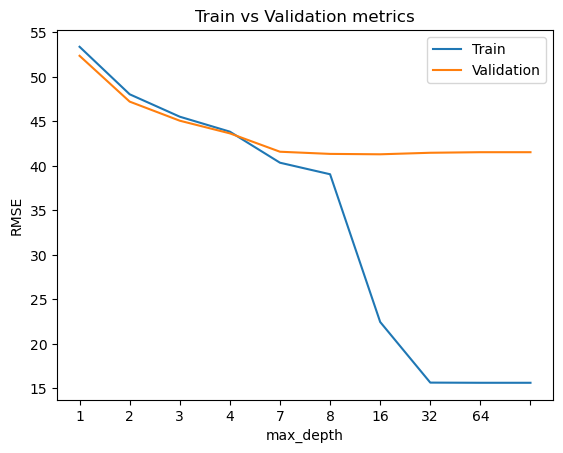

In [15]:
RMSE_list_train = []
RMSE_list_val = []

for max_depth in max_depth_list:

    # fit the model
    model = RandomForestRegressor(max_depth = max_depth,random_state = 42).fit(X_train_scaled,y_train)

    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val_scaled) ## The predicted values for the validation dataset
    RMSE_train = RMSE(y_train,predictions_train)
    RMSE_val = RMSE(y_val,predictions_val)
    RMSE_list_train.append(RMSE_train)
    RMSE_list_val.append(RMSE_val)

plt.title('Train vs Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(RMSE_list_train)
plt.plot(RMSE_list_val)
plt.legend(['Train','Validation'])

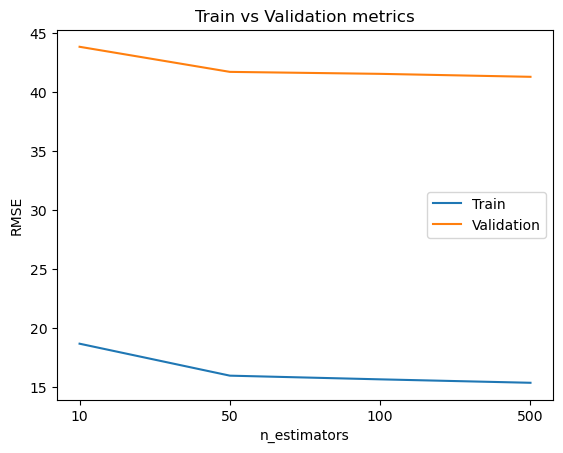

In [16]:
RMSE_list_train = []
RMSE_list_val = []

for n_estimators in n_estimators_list:

    # fit the model
    model = RandomForestRegressor(n_estimators = n_estimators,random_state = 42).fit(X_train_scaled,y_train)

    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val_scaled) ## The predicted values for the validation dataset
    RMSE_train = RMSE(y_train,predictions_train)
    RMSE_val = RMSE(y_val,predictions_val)
    RMSE_list_train.append(RMSE_train)
    RMSE_list_val.append(RMSE_val)

plt.title('Train vs Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(RMSE_list_train)
plt.plot(RMSE_list_val)
plt.legend(['Train','Validation'])

* from graphs above we see that best hyperparameters are:
    - min_samples_split = 30
    - max_depth = 32
    - n_estimators = 500    

In [31]:
random_forest = RandomForestRegressor(n_estimators=500
                                    , max_depth=32,
                                    min_samples_split=30,
                                    random_state=42)

random_forest.fit(X_train_scaled, y_train)

y_train_predict = random_forest.predict(X_train_scaled)
y_val_predict = random_forest.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

random_forest_metrics_select_feature = regressor_metrics('Random Forest', y_val, y_val_predict)
random_forest_metrics_select_feature

R^2 training: 0.810, R^2 test: 0.630


,Random Forest
RMSE,20.564680
MAE,29.387259
R2,0.433016
EVS,0.433720


#### Polynomial Regression

In [32]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    """
    Plot the degree of polynomial vs. train and CV MSEs.
    
    Args:
        degrees (list): List of degrees of polynomial.
        train_mses (list): List of training mean squared errors.
        cv_mses (list): List of cross-validation mean squared errors.
        title (str): Title of the plot.
    """
    plt.plot(degrees, train_mses, label='Train MSE')
    plt.plot(degrees, cv_mses, label='CV MSE')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Root Mean Squared Error')
    plt.title(title)
    plt.legend()
    plt.show()

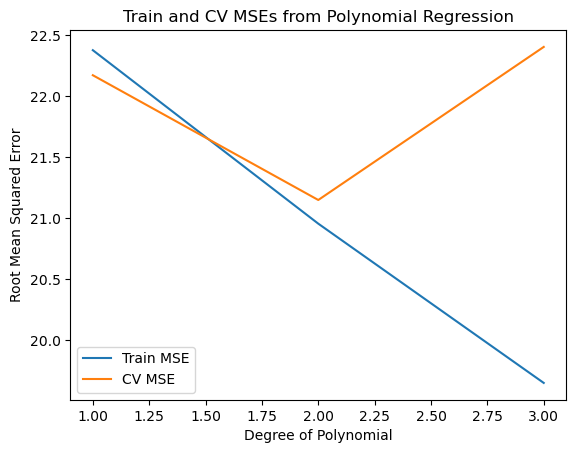

In [16]:
from sklearn.preprocessing import PolynomialFeatures
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,4):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training RMSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = RMSE(y_train, yhat)
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(X_val)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = RMSE(y_val, yhat)
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=np.arange(1,4)
plot_train_cv_mses(degrees, train_mses, cv_mses, 'Train and CV MSEs from Polynomial Regression')


From above 2 degree polynomial model is the best fit for this dataset

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.fit_transform(X_val_scaled)


polyreg = LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_val_predict = polyreg.predict(X_val_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

polyreg_metrics_selected_feature = regressor_metrics('Polynomial Regression', y_val, y_val_predict)
polyreg_metrics_selected_feature


R^2 training: 0.628, R^2 test: 0.609


,Polynomial Regression
RMSE,21.133859
MAE,31.162787
R2,0.402201
EVS,0.403068


#### LightGBM

In [23]:
from sklearn.metrics import make_scorer

# using grid search for hyperparameter tuning

# lightgbm
lgb_params = {
    'n_estimators':[10,50,200,500,700],
    'max_depth':[5,20,30,65,70],
    'learning_rate':[0.01,0.1,0.9,1],
    'random_state':[42],
    'class_weight':['balanced'],
}

# Create the RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                        greater_is_better=False)

lgb_rg = GridSearchCV(LGBMRegressor(),
                    lgb_params,
                    scoring = rmse_scorer,
                    verbose=0
                    )

lgb_rg.fit(X_train_scaled,y_train)

print(lgb_rg.best_params_)

{'class_weight': 'balanced', 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 700, 'random_state': 42}


In [ ]:
lgbm = LGBMRegressor(n_estimators=700, max_depth=20, learning_rate=0.1, random_state=42, class_weight='balanced')
lgbm.fit(X_train_scaled, y_train)

y_train_predict = lgbm.predict(X_train_scaled)
y_val_predict = lgbm.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

lightgbm_metrics_selected_feature = regressor_metrics('LightGBM', y_val, y_val_predict)
lightgbm_metrics_selected_feature

R^2 training: 0.904, R^2 test: 0.532


,LightGBM
RMSE,23.122205
MAE,33.197879
R2,0.434223
EVS,0.442610


## Use All Features

In [34]:
X = df_train[features_all]
y = df_train['ttf']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" X_train shape: {X_train.shape} \n y_train shape: {y_train.shape}")
print(f" X_val shape: {X_val.shape} \n y_val shape: {y_val.shape}")

 X_train shape: (16504, 66) 
 y_train shape: (16504,)
 X_val shape: (4127, 66) 
 y_val shape: (4127,)


In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [36]:
# linear regression

linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

y_train_predict = linear.predict(X_train_scaled)
y_val_predict = linear.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

linear_metrics_all_feature = regressor_metrics('Linear Regression', y_val, y_val_predict)
linear_metrics_all_feature

R^2 training: 0.596, R^2 test: 0.588


,Linear Regression
RMSE,21.698509
MAE,33.280289
R2,0.316007
EVS,0.316246


In [37]:
# random forest

random_forest = RandomForestRegressor(n_estimators=500, max_depth=32, min_samples_split=30, random_state=42)
random_forest.fit(X_train_scaled, y_train)

y_train_predict = random_forest.predict(X_train_scaled)
y_val_predict = random_forest.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

random_forest_metrics_all_feature = regressor_metrics('Random Forest', y_val, y_val_predict)
random_forest_metrics_all_feature

R^2 training: 0.879, R^2 test: 0.732


,Random Forest
RMSE,17.489387
MAE,24.333533
R2,0.615522
EVS,0.615972


In [38]:
# LGBMRegressor

lgbm = LGBMRegressor(n_estimators=700, max_depth=20, learning_rate=0.1, random_state=42, class_weight='balanced')
lgbm.fit(X_train_scaled, y_train)

y_train_predict = lgbm.predict(X_train_scaled)
y_val_predict = lgbm.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (r2_score(y_train, y_train_predict)), 
      (r2_score(y_val, y_val_predict))))

lightgbm_metrics_all_feature = regressor_metrics('LightGBM', y_val, y_val_predict)
lightgbm_metrics_all_feature

R^2 training: 0.970, R^2 test: 0.761


,LightGBM
RMSE,16.520828
MAE,23.215218
R2,0.715390
EVS,0.716711


In [ ]:
# xgboost

from sklearn.metrics import make_scorer


# xgboost
xgb_params = {
    'n_estimators':[30,100,500,700],
    'max_depth':[5,20,30,65],
    'learning_rate':[0.01,0.1,1],
    'random_state':[42],
}

# Create the RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                        greater_is_better=False)

xgb_rg = RandomizedSearchCV(XGBRegressor(),
                    xgb_params,
                    scoring = rmse_scorer,
                    verbose=1
                    )

xgb_rg.fit(X_train_scaled,y_train)

print(xgb_rg.best_params_)


In [39]:
xgb_rg = XGBRegressor(n_estimators=700, max_depth=20, learning_rate=0.1, random_state=42)

xgb_rg.fit(X_train_scaled, y_train)

y_train_predict = xgb_rg.predict(X_train_scaled)
y_val_predict = xgb_rg.predict(X_val_scaled)

print('R^2 training: %.3f, R^2 test: %.3f' % (
    (r2_score(y_train, y_train_predict)),
    (r2_score(y_val, y_val_predict))))

xgb_metrics_all_feature = regressor_metrics('XGBoost', y_val, y_val_predict)
xgb_metrics_all_feature

R^2 training: 1.000, R^2 test: 0.773


,XGBoost
RMSE,16.095827
MAE,21.955815
R2,0.689648
EVS,0.689706


In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.fit_transform(X_val_scaled)


polyreg = LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_val_predict = polyreg.predict(X_val_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
    (r2_score(y_train, y_train_predict)), 
    (r2_score(y_val, y_val_predict))))

polyreg_metrics_all_feature = regressor_metrics('Polynomial Regression', y_val, y_val_predict)
polyreg_metrics_all_feature


R^2 training: 0.678, R^2 test: 0.607


,Polynomial Regression
RMSE,21.188791
MAE,31.584858
R2,0.463993
EVS,0.464255


## Compare all regression models tested

In [86]:
results = pd.concat([linreg_metrics_select_features, linear_metrics_all_feature,
                    random_forest_metrics_select_feature, random_forest_metrics_all_feature,
                    lightgbm_metrics, lightgbm_metrics_all_feature,
                    polyreg_metrics_selected_feature, polyreg_metrics_all_feature,
                    xgb_metrics, xgb_metrics_all_feature,
                    decision_tree_metrics],axis=1)

results

,Linear Regression,Linear Regression,Random Forest,Random Forest,LightGBM,LightGBM,Polynomial Regression,Polynomial Regression,XGBoost,XGBoost,Decision Tree
RMSE,22.170934,21.698509,20.564680,17.489387,20.705908,16.520828,21.133859,21.188791,21.775573,16.095827,21.865888
MAE,34.050297,33.280289,29.387259,24.333533,29.618619,23.215218,31.162787,31.584858,31.011036,21.955815,31.950508
R2,0.268012,0.316007,0.433016,0.615522,0.434949,0.715390,0.402201,0.463993,0.403404,0.689648,0.330729
EVS,0.268345,0.316246,0.433720,0.615972,0.435240,0.716711,0.403068,0.464255,0.403623,0.689706,0.331291


In [87]:
names = ['LinearRegression select feature', 'LinearRegression all feature',
                    'RandomForest select feature', 'RandomForest all feature',
                    'LightGBM select feature', 'LightGBM all feature',
                    'PolyRegression select feature', 'PolyRegression all feature',
                    'XGBoost select feature', 'XGBoost all feature', 'Decision Tree']

results.columns = names

results

,LinearRegression select feature,LinearRegression all feature,RandomForest select feature,RandomForest all feature,LightGBM select feature,LightGBM all feature,PolyRegression select feature,PolyRegression all feature,XGBoost select feature,XGBoost all feature,Decision Tree
RMSE,22.170934,21.698509,20.564680,17.489387,20.705908,16.520828,21.133859,21.188791,21.775573,16.095827,21.865888
MAE,34.050297,33.280289,29.387259,24.333533,29.618619,23.215218,31.162787,31.584858,31.011036,21.955815,31.950508
R2,0.268012,0.316007,0.433016,0.615522,0.434949,0.715390,0.402201,0.463993,0.403404,0.689648,0.330729
EVS,0.268345,0.316246,0.433720,0.615972,0.435240,0.716711,0.403068,0.464255,0.403623,0.689706,0.331291


In [88]:
results.loc['RMSE'].sort_values(ascending=True)

XGBoost all feature                16.095827
LightGBM all feature               16.520828
RandomForest all feature           17.489387
RandomForest select feature        20.564680
LightGBM select feature            20.705908
PolyRegression select feature      21.133859
PolyRegression all feature         21.188791
LinearRegression all feature       21.698509
XGBoost select feature             21.775573
Decision Tree                      21.865888
LinearRegression select feature    22.170934
Name: RMSE, dtype: float64

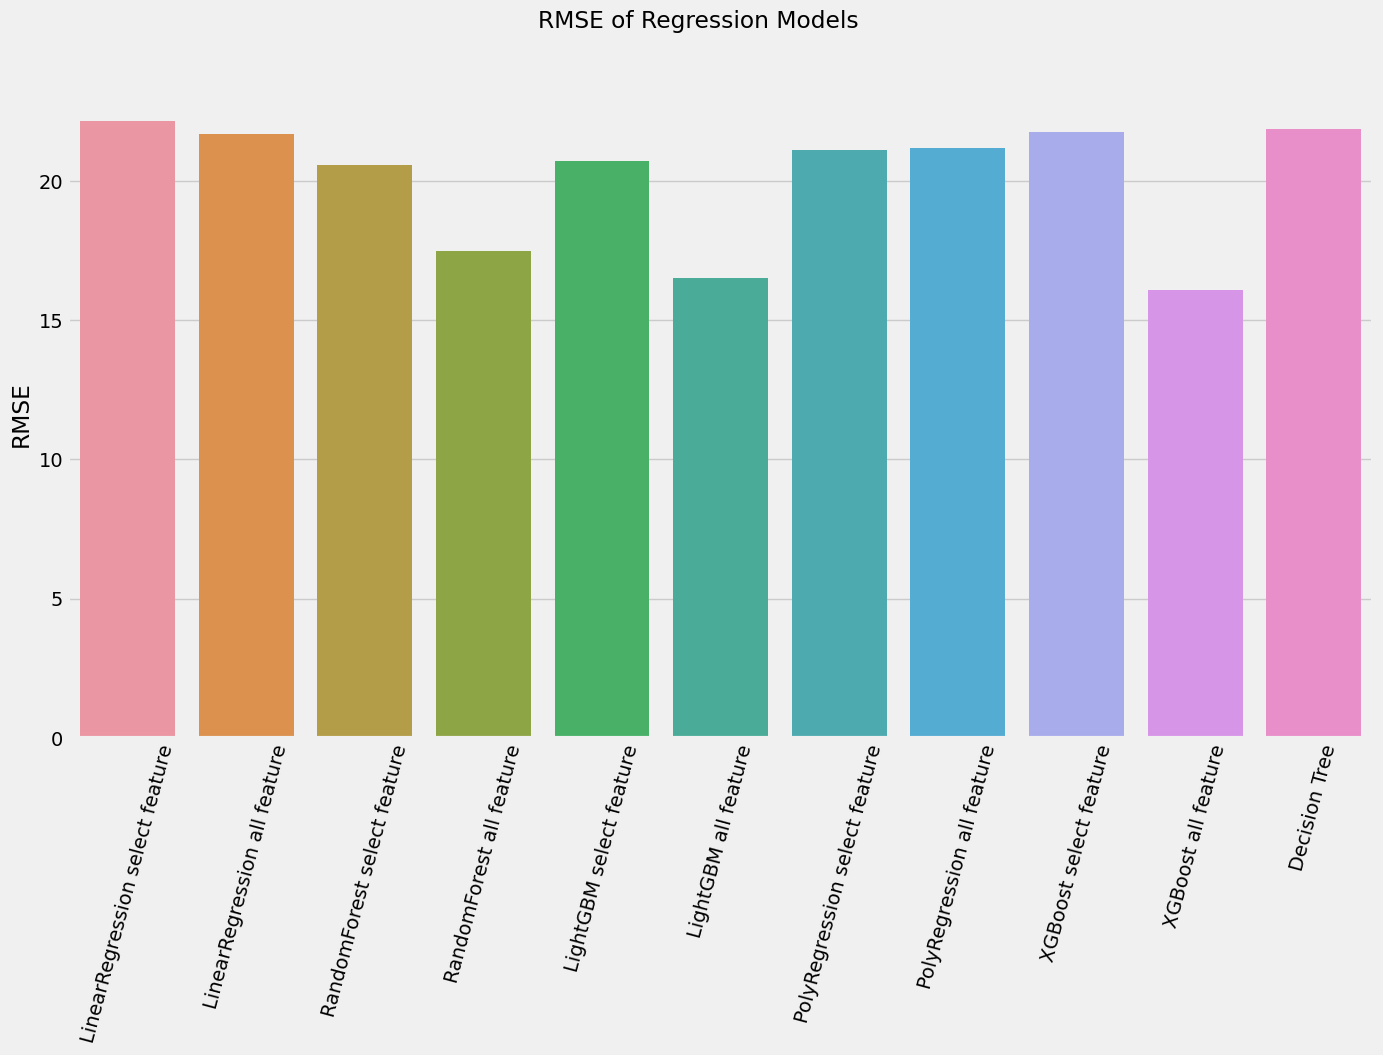

In [94]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15, 8))
sns.barplot(x=names, y=results.loc['RMSE'])
fig.suptitle('RMSE of Regression Models')
plt.ylabel('RMSE')
plt.xticks(rotation=75)
plt.show()

**Regression Summary:** 

In accordance with our analysis in the data exploratory phase, non-linear regression models like Polynomial, Random Forest, LightGBM and XGBoost performed better than linear model. **xgboost** clearly outperformed other models scoring RMSE of 16.095827 cycles, i.e. the model predicts TTF within average error range of ±16 cycles.
